### Business problem

Dataset of a bank, the objective is to give some insights about the churn rate found in the bank (when a client stops to being a client). The dataset consists in info collected since 6 months ago, like geography of the client, age, tenure, balance, num of product, has credit card, is active member and if they have exited from the bank.

Create a geodemographic segmentation model that tell the bank which of their customers are at the highest risk of leaving. 

## Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

2023-04-25 19:58:40.520707: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Part 1 - Data Preprocessing

#### Dataset

In [2]:
DATASET_PATH = "../../../../datasets/ml_az_course/012_churn_modeling.csv"
data = pd.read_csv(DATASET_PATH)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x = data.iloc[:, 3:-1].values # ignore the irst three columns
y = data.iloc[:, -1].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

#### Encoding categorical data

In [4]:
# encode gender column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x[:, 2] = label_encoder.fit_transform(x[:, 2])
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# perform hot-encoding on geography column

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough"
)
x = np.array(ct.fit_transform(x))
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

#### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train[:3], y_train[:3]

(array([[1.0, 0.0, 0.0, 686, 1, 32, 6, 0.0, 2, 1, 1, 179093.26],
        [0.0, 1.0, 0.0, 632, 1, 42, 4, 119624.6, 2, 1, 1, 195978.86],
        [0.0, 0.0, 1.0, 559, 1, 24, 3, 114739.92, 1, 1, 0, 85891.02]],
       dtype=object),
 array([0, 0, 1]))

#### Feature scaling

In [7]:
# it's good idea to stability of training to apply scaling to all features.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
x_train[:1, :3]

array([[ 1.00150113, -0.57946723, -0.57638802]])

In [17]:
len(x_train)

8000

### Part 2 - Building the ANN

#### Initializing the ANN

In [10]:
ann = tf.keras.models.Sequential()

#### Adding the input layer and the first hidden layer

In [11]:
ann.add(layer=tf.keras.layers.Dense(units=6, activation="relu"))

#### Adding the second layer hidden layer

In [12]:
ann.add(layer=tf.keras.layers.Dense(units=7, activation="relu"))

#### Adding the output layer

In [13]:
ann.add(layer=tf.keras.layers.Dense(units=1, activation="sigmoid"))

### Part 3 - Training the ANN

#### Compiling the ANN

In [14]:
ann.compile(
    optimizer="adam", # a replacement optimization algorithm for stochastic gradient descent 
    loss="binary_crossentropy", 
    metrics=["accuracy"],
)

#### Training the ANN

In [16]:
ann.fit(x=x_train, y=y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 13ms/step - loss: 0.4060 - accuracy: 0.8305
Epoch 2/100
250/250 [==============================] - 3s 10ms/step - loss: 0.4041 - accuracy: 0.8311
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 0.4033 - accuracy: 0.8324
Epoch 4/100
250/250 [==============================] - 3s 10ms/step - loss: 0.4019 - accuracy: 0.8339
Epoch 5/100
250/250 [==============================] - 2s 10ms/step - loss: 0.4010 - accuracy: 0.8319
Epoch 6/100
250/250 [==============================] - 3s 13ms/step - loss: 0.4004 - accuracy: 0.8332
Epoch 7/100
250/250 [==============================] - 3s 10ms/step - loss: 0.3996 - accuracy: 0.8338
Epoch 8/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3990 - accuracy: 0.8328
Epoch 9/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3979 - accuracy: 0.8347
Epoch 10/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3973 -

### Part 4 - Making the predictions and evaluating the model

#### Predicting the result of a single observation

Use the model to predict if the customer with the following informations will leave the bank:

- Geography: France
- Credit score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60_000
- Numb of products: 2
- Does this customer have a credit card? Yes
- Is this customer an active member: yes
- Estimated salary: $ 50_000
- So, should we say goodbye to that customers? X (thing to predict)

In [20]:
# one-hot encoding for France is 1 0 0

ann.predict(
    x=sc.transform([[1, 0, 0, 600, 1, 40, 3, 60_000, 2, 1, 1, 50_000]])
)

1/1 [==============================] - 1s 527ms/step


array([[0.02350391]], dtype=float32)

so the answer is NO, the customer will stay

#### Predicting the Test set results

In [22]:
preds = ann.predict(x=x_test)

threshold = 0.5
preds = (preds > threshold)

63/63 [==============================] - 1s 14ms/step


#### Making the confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test, y_pred=preds)
cm

array([[1545,   62],
       [ 211,  182]])

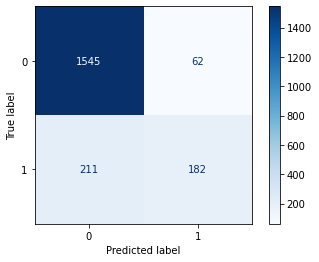

In [37]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array([0, 1]))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [24]:
accuracy_score(y_true=y_test, y_pred=preds)


0.8635